In [1]:
%matplotlib inline
import networkx as nx
import pandas as pd

In [2]:
import networkx as nx
from networkx.algorithms import approximation
import matplotlib.pyplot as plt
from collections import Counter
import random
from itertools import combinations, groupby

import statistics

def local_summaries(G, directed=False):
    betweenness_centrality = nx.centrality.betweenness_centrality(G)
    eigenvector_centrality = nx.centrality.eigenvector_centrality(G)
    closeness_centrality = nx.centrality.closeness_centrality(G)
    if directed:
        in_degrees = [G.in_degree(n) for n in G.nodes]
        out_degrees = [G.in_degree(n) for n in G.nodes]
        return zip(betweenness_centrality.values(), eigenvector_centrality.values(), closeness_centrality.values(), in_degrees, out_degrees)
    else:
        degrees = [G.degree(n) for n in G.nodes]
        return zip(betweenness_centrality.values(), eigenvector_centrality.values(), closeness_centrality.values(), degrees)

def global_summaries(G):
    try:
        diameter = nx.algorithms.distance_measures.diameter(G)
    except:
        diameter = "Found infinite path length because the graph is not connected !"
    clustering_coefficient = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)
    number_of_nodes = G.number_of_edges()
    number_of_edges = G.number_of_nodes()
    number_of_connected_components = nx.number_connected_components(G)
    largest_connected_component = max([ len(i) for i in list(nx.connected_components(G))])
    print("##### Global Summaries #####")
    print("Diameter : ",diameter)
    print("Number of Nodes : ",number_of_nodes)
    print("Number of Edges : ",number_of_edges)
    print("Number of Connected Components : ",number_of_connected_components)
    print("Size of the Largest Connected Compopnent : ",largest_connected_component)
    
def explore_and_summarize_network(edgelist, vertices, subgraph, directed=False):
    """
    Concisely summarizes any induced subgraph of the input network
    """
    G = nx.Graph()
    if subgraph is not None:
        induced_edges = [ edge for edge in edgelist if ((edge[0] in subgraph) and (edge[1] in subgraph))]
        G.add_nodes_from(subgraph)
        G.add_edges_from(induced_edges, nodetype=int)
    else :
        G.add_nodes_from(vertices)
        G.add_edges_from(edgelist, nodetype=int)
    
    # (a)
    nx.draw(G,pos=nx.spring_layout(G),node_color='maroon',
        node_size=20,
        edge_color="gray",
        width=0.5)
    plt.show()
    # (b)
    if directed:
        in_degree_sequence = [item[-2] for item in local_summaries(G)]
        in_degree_counts = Counter(degree_sequence)
        fig, ax = plt.subplots()
        ax.bar(in_degree_counts.keys(), in_degree_counts.values())
        ax.set_xlabel('Nodes')
        ax.set_ylabel('In Degrees')
        ax.set_title(r'Histogram of in_degrees')
        fig.tight_layout()
        plt.show()
        
        out_degree_sequence = [item[-1] for item in local_summaries(G)]
        out_degree_counts = Counter(out_degree_sequence)
        fig, ax = plt.subplots()
        ax.bar(out_degree_counts.keys(), out_degree_counts.values())
        ax.set_xlabel('Nodes')
        ax.set_ylabel('out Degrees')
        ax.set_title(r'Histogram of out_degrees')
        fig.tight_layout()
        plt.show() 
    else:
        degree_sequence = [item[-1] for item in local_summaries(G)]
        degree_counts = Counter(degree_sequence)
        fig, ax = plt.subplots()
        ax.bar(degree_counts.keys(), degree_counts.values())
        ax.set_xlabel('Nodes')
        ax.set_ylabel('Degrees')
        ax.set_title(r'Histogram of degrees')
        fig.tight_layout()
        plt.show() 
    # (c)

    # Print Global Summaries
    global_summaries(G)

In [3]:
import os
import glob
import networkx as nx

def load_edges_from_folder(folder_path):
    all_edges = []
    # Recursively search for all .edges files in the folder and subfolders
    edges_files = glob.glob(os.path.join(folder_path, '**', '*.edges'), recursive=True)
    
    # Iterate over each file and load edges
    for edges_file in edges_files:
        edges = load_edges(edges_file)
        all_edges.extend(edges)
    
    return all_edges

def load_edges(filename):
    edges = []
    with open(filename, 'r') as file:
        for line in file:
            try:
                nodes = line.strip().split()
                edges.append((int(nodes[0]), int(nodes[1])))
            except ValueError:
                print(f"Skipping malformed line in {filename}: {line.strip()}")
    return edges

# Usage
folder_path = './twitter'
all_edges = load_edges_from_folder(folder_path)
# Create a NetworkX graph with all edges
graph = nx.DiGraph()  # Directed graph for Twitter
graph.add_edges_from(all_edges)

# Compute node degrees and PageRank
degrees = dict(graph.degree())
pagerank = nx.pagerank(graph)

# Print graph information
print("Total edges in the graph:", graph.number_of_edges())
print("Total nodes in the graph:", graph.number_of_nodes())

# Print a sample of the PageRank scores (first 10 items)
print("\nSample PageRank scores:")
for node, score in list(pagerank.items())[:10]:
    print(f"Node {node}: {score}")
# explore_and_summarize_network(edgelist = graph.edges(), vertices=graph.nodes(), subgraph=None)


Total edges in the graph: 1667885
Total nodes in the graph: 76245

Sample PageRank scores:
Node 16287561: 7.929357865974779e-06
Node 16592928: 1.3971526881333263e-05
Node 14691709: 0.0001778287763831187
Node 1344951: 0.0004652651751777587
Node 67393327: 1.1640490911759655e-05
Node 15862493: 2.591604444390756e-05
Node 19525652: 2.305041161110783e-05
Node 18194218: 3.2336428145086865e-05
Node 18668992: 1.1611805868002972e-05
Node 77007853: 0.00010309873263259329


In [4]:
def load_circles_from_folder(folder_path):
    all_circles = {}
    # Recursively search for all .circles files in the folder and subfolders
    circles_files = glob.glob(os.path.join(folder_path, '**', '*.circles'), recursive=True)
    
    # Iterate over each file and load circles
    for circles_file in circles_files:
        circles = load_circles(circles_file)
        # Update the overall dictionary of circles
        all_circles.update(circles)
    
    return all_circles

def load_circles(filename):
    circles = {}
    with open(filename, 'r') as file:
        for line in file:
            circle_data = line.strip().split()
            circle_name = circle_data[0]
            circle_members = list(map(int, circle_data[1:]))
            circles[circle_name] = circle_members
    return circles

# Usage
folder_path = './twitter'
all_circles = load_circles_from_folder(folder_path)

# Example to print loaded circles
for circle_name, members in all_circles.items():
    print(f"Circle: {circle_name}, Members: {members}")

Circle: 0, Members: [9227962, 6085372, 20624600, 14232363, 6086752, 4065921, 3277381, 3721461, 7446452, 5650332, 14482539, 22900797, 3550301]
Circle: 1, Members: [15855840, 23569480, 12477592]
Circle: 2, Members: [52260545, 99670388]
Circle: 3, Members: [235465070]
Circle: 4, Members: [213697723, 260615063, 119933537, 252828803, 260141933, 97363960, 45998124, 177146917, 145184040]
Circle: 5, Members: [164998160, 153996235, 288932529, 154070583, 120178497, 140741639, 52012019, 51999405, 52284349, 52283878]
Circle: 6, Members: [223101253, 151734679, 93802418, 104684119]
Circle: 7, Members: [21163925, 15243411, 20452100, 18520053, 38197323]
Circle: 8, Members: [132556062, 16393680]
Circle: 9, Members: [15243411, 33224364]
Circle: 10, Members: [206923844, 123371682, 241363871]
Circle: 11, Members: [64422751, 40123277, 49958776]
Circle: 12, Members: [20452100, 38197323]
Circle: 13, Members: [321696489, 333739200, 335538156, 339985764, 43003845, 42243120, 34428380, 22462180, 40981798, 241363

In [5]:
# Function to load all `.feat` files from a folder
def load_features_from_folder(folder_path):
    all_features = []
    feat_files = glob.glob(os.path.join(folder_path, '**', '*.feat'), recursive=True)

    for feat_file in feat_files:
        features = pd.read_csv(feat_file, sep=' ', header=None)
        features.rename(columns={0:"user_id"}, inplace=True)
        all_features.append(features)

    # Concatenate all the features into a single DataFrame
    combined_features = pd.concat(all_features, ignore_index=True)
    return combined_features

# Function to load all `.egofeat` files from a folder
def load_ego_features_from_folder(folder_path):
    all_ego_features = []
    ego_feat_files = glob.glob(os.path.join(folder_path, '**', '*.egofeat'), recursive=True)

    for ego_feat_file in ego_feat_files:
        ego_features = pd.read_csv(ego_feat_file, sep=' ', header=None)
        all_ego_features.append(ego_features)

    # Concatenate all ego features into a single DataFrame
    combined_ego_features = pd.concat(all_ego_features, ignore_index=True)
    return combined_ego_features

# Function to load all `.featnames` files from a folder
def load_featnames_from_folder(folder_path):
    all_featnames = {}
    featnames_files = glob.glob(os.path.join(folder_path, '**', '*.featnames'), recursive=True)

    for featnames_file in featnames_files:
        with open(featnames_file, 'r') as file:
            for line in file:
                idx, name = line.strip().split(' ', 1)
                all_featnames[int(idx)] = name

    return all_featnames

# Usage
folder_path = './twitter'

# Load `.feat` files
all_features = load_features_from_folder(folder_path)
print("Features DataFrame:")
print(all_features)

# Load `.egofeat` files
all_ego_features = load_ego_features_from_folder(folder_path)
print("Ego Features DataFrame:")
print(all_ego_features)

# Load `.featnames` files
all_featnames = load_featnames_from_folder(folder_path)
print("Feature Names Dictionary:")
print(all_featnames)

Features DataFrame:
          user_id  1    2    3    4    5    6    7    8    9  ...  2262  2263  \
0        51828900  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   NaN   NaN   
1        18584875  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   NaN   NaN   
2       217546128  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   NaN   NaN   
3       234169190  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   NaN   NaN   
4        39157827  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   NaN   NaN   
...           ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
133852   13691782  0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   NaN   NaN   
133853   21436960  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   NaN   NaN   
133854  104989762  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   NaN   NaN   
133855   15144542  0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   NaN   NaN   
133856   37964895  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   NaN   NaN   

       

Preprocess Data

In [6]:
all_features.fillna(0, inplace=True)
all_ego_features.fillna(0, inplace=True)
print(all_features)
# print(all_ego_features)


          user_id  1    2    3    4    5    6    7    8    9  ...  2262  2263  \
0        51828900  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1        18584875  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2       217546128  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3       234169190  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4        39157827  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
...           ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
133852   13691782  0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   0.0   0.0   
133853   21436960  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
133854  104989762  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
133855   15144542  0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   0.0   0.0   
133856   37964895  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

        2264  2265  2266  2

features nomalization

In [39]:
# Generate the list of hashtags for each user and store them in a separate DataFrame
# hashtags_used = all_features.apply(
#     lambda row: [all_featnames.get(i) for i in row.index[1:] if row[i] == 1],
#     axis=1
# )

# # Create a new DataFrame with the user_id and hashtags_used columns
# hashtags_df = pd.DataFrame({
#     'user_id': all_features['user_id'],
#     'hashtags_used': hashtags_used
# })

# Optional: If you don't need the binary feature columns, set all_features to hashtags_df
# all_features = hashtags_df

# Print the resulting DataFrame with hashtags used


KeyboardInterrupt: 

In [7]:
hashtags_df = pd.read_csv("user_hashtags.csv")
print(hashtags_df.head())


     user_id                                      hashtags_used
0   51828900  ['#PAXEast', '#UMGClassic', '#runescape', '@9p...
1   18584875                                   ['@JCannon_nV:']
2  217546128  ['#Prototype2', '@BOMBHOR', '@Chipotle', '@Gea...
3  234169190  ['#Ireallydontcareaboutwhattheinternetthinks',...
4   39157827                          ['@DrChiz', '@FaZeFakie']


In [8]:
degrees= dict(graph.degree())
pagerank = nx.pagerank(graph)

In [9]:
# Create a DataFrame with the new columns

new_columns = pd.DataFrame({
    'node_id': all_features.index,
    'degree': all_features.index.map(degrees),
    'pagerank': all_features.index.map(pagerank)
})

# Concatenate the new columns with the original DataFrame
all_features = pd.concat([all_features, new_columns], axis=1)

print(all_features)

          user_id  1    2    3    4    5    6    7    8    9  ...  2265  2266  \
0        51828900  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1        18584875  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2       217546128  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3       234169190  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4        39157827  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
...           ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
133852   13691782  0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   0.0   0.0   
133853   21436960  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
133854  104989762  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
133855   15144542  0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   0.0   0.0   
133856   37964895  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

        2267  2268  2269  2

Community Partition: {16287561: 0, 16592928: 0, 14691709: 0, 1344951: 1, 67393327: 0, 15862493: 0, 19525652: 0, 18194218: 0, 18668992: 0, 77007853: 0, 22841103: 0, 32357759: 0, 27677879: 0, 17076888: 0, 8033482: 0, 29069574: 0, 24595743: 0, 19394186: 0, 153674101: 0, 14197132: 0, 19071487: 0, 16905553: 0, 18021105: 0, 6608332: 0, 18715225: 0, 16799897: 0, 14799177: 0, 35406821: 0, 42092597: 0, 95449578: 0, 195428182: 0, 57903424: 0, 6889982: 2, 149994738: 0, 14250702: 0, 16220934: 0, 19898730: 0, 15431107: 0, 15578992: 0, 24585498: 0, 9720292: 3, 15259010: 0, 17872874: 0, 115236840: 0, 18729547: 0, 20926806: 0, 13455982: 0, 15657398: 0, 14880937: 4, 7065942: 0, 20104303: 0, 18900668: 0, 25732138: 0, 96593097: 0, 25489250: 5, 44671378: 0, 69980643: 0, 14711640: 0, 38505396: 0, 90420314: 5, 185947721: 0, 36969785: 0, 9095652: 0, 169921002: 0, 43408165: 0, 176379217: 0, 19898280: 0, 18607767: 0, 87764480: 0, 11928542: 0, 19178182: 0, 10671602: 0, 20867054: 0, 34260638: 0, 14303746: 0, 191

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


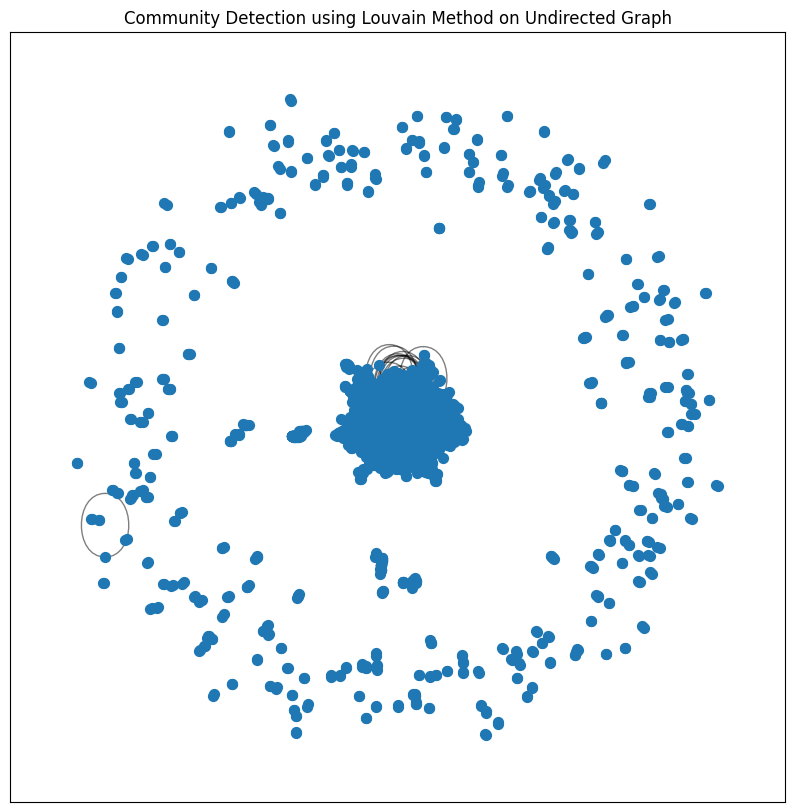

In [10]:
# Convert directed graph to undirected
G_undirected = graph.to_undirected()

# Now apply the Louvain method for community detection on the undirected graph
import community as community_louvain

# Compute the partition using the Louvain method
partition = community_louvain.best_partition(G_undirected)

# Print the community assigned to each node
print("Community Partition:", partition)

# Optional: Visualize the communities
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_undirected)  # Positioning for nodes
nx.draw_networkx_nodes(G_undirected, pos, partition.keys(), node_size=50, cmap=plt.cm.rainbow)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.5)
plt.title("Community Detection using Louvain Method on Undirected Graph")
plt.show()


In [11]:
print("Community Partition:", partition)

# Count the number of communities and size of each community
from collections import Counter
community_counts = Counter(partition.values())
num_communities = len(community_counts)
print(f"Number of communities: {num_communities}")
print("Size of each community:", dict(community_counts))

# Calculate modularity of the partition
modularity = community_louvain.modularity(partition, G_undirected)
print(f"Modularity: {modularity:.4f}")

Community Partition: {16287561: 0, 16592928: 0, 14691709: 0, 1344951: 1, 67393327: 0, 15862493: 0, 19525652: 0, 18194218: 0, 18668992: 0, 77007853: 0, 22841103: 0, 32357759: 0, 27677879: 0, 17076888: 0, 8033482: 0, 29069574: 0, 24595743: 0, 19394186: 0, 153674101: 0, 14197132: 0, 19071487: 0, 16905553: 0, 18021105: 0, 6608332: 0, 18715225: 0, 16799897: 0, 14799177: 0, 35406821: 0, 42092597: 0, 95449578: 0, 195428182: 0, 57903424: 0, 6889982: 2, 149994738: 0, 14250702: 0, 16220934: 0, 19898730: 0, 15431107: 0, 15578992: 0, 24585498: 0, 9720292: 3, 15259010: 0, 17872874: 0, 115236840: 0, 18729547: 0, 20926806: 0, 13455982: 0, 15657398: 0, 14880937: 4, 7065942: 0, 20104303: 0, 18900668: 0, 25732138: 0, 96593097: 0, 25489250: 5, 44671378: 0, 69980643: 0, 14711640: 0, 38505396: 0, 90420314: 5, 185947721: 0, 36969785: 0, 9095652: 0, 169921002: 0, 43408165: 0, 176379217: 0, 19898280: 0, 18607767: 0, 87764480: 0, 11928542: 0, 19178182: 0, 10671602: 0, 20867054: 0, 34260638: 0, 14303746: 0, 191

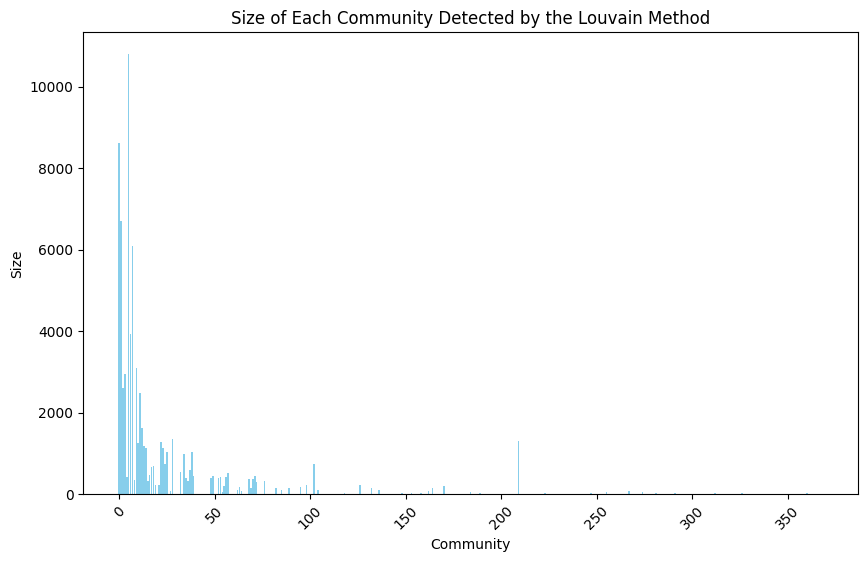

In [12]:
community_counts = {}
for node, community in partition.items():
    if community not in community_counts:
        community_counts[community] = 0
    community_counts[community] += 1

# Plot the size of each community as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(community_counts.keys(), community_counts.values(), color='skyblue')
plt.xlabel("Community")
plt.ylabel("Size")
plt.title("Size of Each Community Detected by the Louvain Method")
plt.xticks(rotation=45)
plt.show()